In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

import matplotlib

import numpy as np

%matplotlib notebook

## Goals
1. Create a GIF/videos to analyze individual episode with ITI images and current echo.
2. Analyze the 2 sucess episodes of v2c1 --> see how did how did it do?

`episode_details`   
Episode_id | case ID | ending | obj0_x | ending | obj0_y | obj1_x | obj1_y | obj2_x | obj2_y   
`records`   
Episode_id | action_index | bat_x | bat_y | bat_a | echo_100   

In [27]:
v1_metrics = np.load('agent_checkpoints/simple_09.09.21_v1/evaluation_metrics.npz')
v2_metrics = np.load('agent_checkpoints/simple_09.09.21_v2/evaluation_metrics.npz')
v3_metrics = np.load('agent_checkpoints/simple_09.09.21_v3/evaluation_metrics.npz')
v4_metrics = np.load('agent_checkpoints/simple_09.09.21_v4/evaluation_metrics.npz')
v5_metrics = np.load('agent_checkpoints/simple_09.09.21_v5/evaluation_metrics.npz')
v0_metrics = np.load('agent_checkpoints/simple_09.09.21_v0/evaluation_metrics.npz')
v1x_metrics = np.load('agent_checkpoints/simple_09.09.21_v1x/evaluation_metrics.npz')
v2x_metrics = np.load('agent_checkpoints/simple_09.09.21_v2x/evaluation_metrics.npz')
v3x_metrics = np.load('agent_checkpoints/simple_09.09.21_v3x/evaluation_metrics.npz')
v4x_metrics = np.load('agent_checkpoints/simple_09.09.21_v4x/evaluation_metrics.npz')
v5x_metrics = np.load('agent_checkpoints/simple_09.09.21_v5x/evaluation_metrics.npz')
v0x_metrics = np.load('agent_checkpoints/simple_09.09.21_v0x/evaluation_metrics.npz')


#### Reminder: 
`episode_details`   
Episode_id | case ID | ending | obj0_x | obj0_y | obj1_x | obj1_y | obj2_x | obj2_y   
`records`   
Episode_id | action_index | bat_x | bat_y | bat_a | echo_100   

In [10]:
list(v1_metrics.keys())

['training_avg_returns', 'success_rate', 'episode_details', 'records']

<IPython.core.display.Javascript object>


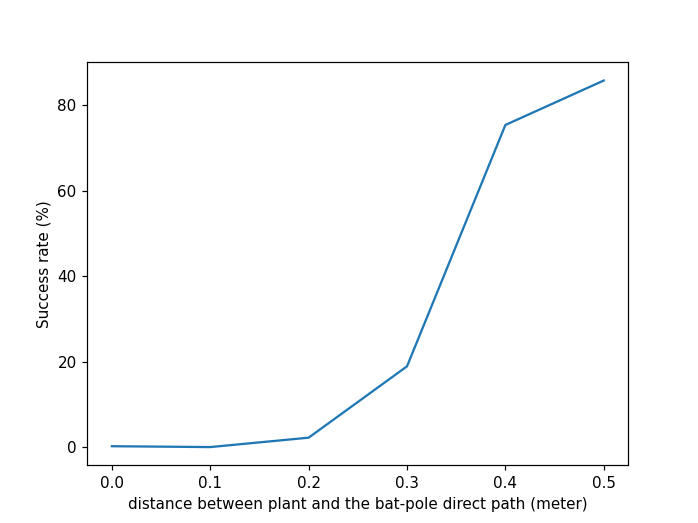

Text(0, 0.5, 'Success rate (%)')

In [42]:
out_of_way = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])
performance_1 = np.array([v0_metrics['success_rate'],
                 v1_metrics['success_rate'],
                 v2_metrics['success_rate'],
                 v3_metrics['success_rate'],
                 v4_metrics['success_rate'],
                 v5_metrics['success_rate']])
"""performance_2 = [v0x_metrics['success_rate'],
                 v1x_metrics['success_rate'],
                 v2x_metrics['success_rate'],
                 v3x_metrics['success_rate'],
                 v4x_metrics['success_rate'],
                 v5x_metrics['success_rate']]
"""
plt.plot(out_of_way, 100*performance_1, label='no statics -1')
#plt.plot(out_of_way, performance_2, label='static -1')
plt.legend
plt.xlabel('distance between plant and the bat-pole direct path (meter)')
plt.ylabel('Success rate (%)')

In [43]:
def get_xya_in_case(case_list):
    xya = np.array([]).reshape(0,3)
    for i in range(len(case_list)):
        temp = case_list[i][:,2:5]
        xya = np.vstack((xya, temp))
    return xya

In [44]:
def get_case_list_from_metrics(metrics):
    search = metrics['episode_details'][metrics['episode_details'][:,1] == 0][:,0]
    c0_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    search = metrics['episode_details'][metrics['episode_details'][:,1] == 1][:,0]
    c1_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    search = metrics['episode_details'][metrics['episode_details'][:,1] == 2][:,0]
    c2_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    return c0_list, c1_list, c2_list


In [45]:
def get_case_list_from_list(e_list, metrics):
    c0_list = []
    c1_list = []
    c2_list = []
    for episode in e_list:
        episode_id = episode[0,0]
        if metrics['episode_details'][metrics['episode_details'][:,0]==episode_id][0, 1] == 0:
            c0_list.append(episode)
        elif metrics['episode_details'][metrics['episode_details'][:,0]==episode_id][0, 1] == 1:
            c1_list.append(episode)
        elif metrics['episode_details'][metrics['episode_details'][:,0]==episode_id][0, 1] == 2:
            c2_list.append(episode)
    return c0_list, c1_list, c2_list

In [46]:
def get_ending_case_obj_from_metrics(metrics, ending=0):
    temp = metrics['episode_details'][metrics['episode_details'][:,1] == 0]
    c0_obj = temp[temp[:,2]==ending][:,3:9]
    temp = metrics['episode_details'][metrics['episode_details'][:,1] == 1]
    c1_obj = temp[temp[:,2]==ending][:,3:9]
    temp = metrics['episode_details'][metrics['episode_details'][:,1] == 2]
    c2_obj = temp[temp[:,2]==ending][:,3:9]
    return c0_obj, c1_obj, c2_obj

In [47]:
def get_case_obj_from_metrics(metrics):
    c0_obj = metrics['episode_details'][metrics['episode_details'][:,1] == 0][:,3:9]
    c1_obj = metrics['episode_details'][metrics['episode_details'][:,1] == 1][:,3:9]
    c2_obj = metrics['episode_details'][metrics['episode_details'][:,1] == 2][:,3:9]
    return c0_obj, c1_obj, c2_obj

In [48]:
def get_ending_list_from_metrics(metrics):
    search = metrics['episode_details'][metrics['episode_details'][:,2] == 0][:,0]
    e0_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    search = metrics['episode_details'][metrics['episode_details'][:,2] == 1][:,0]
    e1_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    search = metrics['episode_details'][metrics['episode_details'][:,2] == 2][:,0]
    e2_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    search = metrics['episode_details'][metrics['episode_details'][:,2] == 3][:,0]
    e3_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    search = metrics['episode_details'][metrics['episode_details'][:,2] == 4][:,0]
    e4_list = [metrics['records'][metrics['records'][:,0]==i] for i in search]
    return e0_list, e1_list, e2_list, e3_list, e4_list

In [49]:
import time

In [50]:
tic = time.time()
v1c0, v1c1, v1c2 = get_case_list_from_metrics(v1_metrics)
v2c0, v2c1, v2c2 = get_case_list_from_metrics(v2_metrics)
toc = time.time()
print(toc - tic)

KeyboardInterrupt: 

In [11]:
tic = time.time()
v1c0_xya, v1c1_xya, v1c2_xya = (get_xya_in_case(v1c0), get_xya_in_case(v1c1), get_xya_in_case(v1c2))
v2c0_xya, v2c1_xya, v2c2_xya = (get_xya_in_case(v2c0), get_xya_in_case(v2c1), get_xya_in_case(v2c2))
toc = time.time()
print(toc - tic)

0.1676790714263916


In [12]:
tic = time.time()
v1c0_obj, v1c1_obj, v1c2_obj = get_case_obj_from_metrics(v1_metrics)
v2c0_obj, v2c1_obj, v2c2_obj = get_case_obj_from_metrics(v2_metrics)
toc = time.time()
print(toc - tic)

0.003381013870239258


In [13]:
tic = time.time()
v1e0_list, v1e1_list, v1e2_list, v1e3_list, v1e4_list = get_ending_list_from_metrics(v1_metrics)
v2e0_list, v2e1_list, v2e2_list, v2e3_list, v2e4_list = get_ending_list_from_metrics(v2_metrics)
toc = time.time()
print(toc - tic)

36819.08103299141


In [14]:
tic = time.time()
v1end = [i for i in [v1e0_list, v1e1_list, v1e2_list, v1e3_list, v1e4_list]]
v2end = [i for i in [v2e0_list, v2e1_list, v2e2_list, v2e3_list, v2e4_list]]
toc = time.time()
print(toc - tic)

4.76837158203125e-05


In [15]:
tic = time.time()
v1e0c0_list, v1e0c1_list, v1e0c2_list = get_case_list_from_list(v1e0_list, v1_metrics)
v2e0c0_list, v2e0c1_list, v2e0c2_list = get_case_list_from_list(v2e0_list, v2_metrics)
toc = time.time()
print(toc - tic)

1.6476140022277832


In [16]:
tic = time.time()
v1e0c0_xya, v1e0c1_xya, v1e0c2_xya = (get_xya_in_case(v1e0c0_list), get_xya_in_case(v1e0c1_list), get_xya_in_case(v1e0c2_list))
v2e0c0_xya, v2e0c1_xya, v2e0c2_xya = (get_xya_in_case(v2e0c0_list), get_xya_in_case(v2e0c1_list), get_xya_in_case(v2e0c2_list))
toc = time.time()
print(toc - tic)

0.025148868560791016


In [17]:
tic = time.time()
v1e0c0_obj, v1e0c1_obj, v1e0c2_obj = get_ending_case_obj_from_metrics(v1_metrics)
v2e0c0_obj, v2e0c1_obj, v2e0c2_obj = get_ending_case_obj_from_metrics(v2_metrics)
toc = time.time()
print(toc - tic)

0.0033721923828125


In [18]:
v1e2c0_list, v1e2c1_list, v1e2c2_list = get_case_list_from_list(v1e2_list, v1_metrics)
v2e2c0_list, v2e2c1_list, v2e2c2_list = get_case_list_from_list(v2e2_list, v2_metrics)

v1e2c0_xya, v1e2c1_xya, v1e2c2_xya = (get_xya_in_case(v1e2c0_list), get_xya_in_case(v1e2c1_list), get_xya_in_case(v1e2c2_list))
v2e2c0_xya, v2e2c1_xya, v2e2c2_xya = (get_xya_in_case(v2e2c0_list), get_xya_in_case(v2e2c1_list), get_xya_in_case(v2e2c2_list))

v1e2c0_obj, v1e2c1_obj, v1e2c2_obj = get_ending_case_obj_from_metrics(v1_metrics, ending=2)
v2e2c0_obj, v2e2c1_obj, v2e2c2_obj = get_ending_case_obj_from_metrics(v2_metrics, ending=2)

############

v1e3c0_list, v1e3c1_list, v1e3c2_list = get_case_list_from_list(v1e3_list, v1_metrics)
v2e3c0_list, v2e3c1_list, v2e3c2_list = get_case_list_from_list(v2e3_list, v2_metrics)

v1e3c0_xya, v1e3c1_xya, v1e3c2_xya = (get_xya_in_case(v1e3c0_list), get_xya_in_case(v1e3c1_list), get_xya_in_case(v1e3c2_list))
v2e3c0_xya, v2e3c1_xya, v2e3c2_xya = (get_xya_in_case(v2e3c0_list), get_xya_in_case(v2e3c1_list), get_xya_in_case(v2e3c2_list))

v1e3c0_obj, v1e3c1_obj, v1e3c2_obj = get_ending_case_obj_from_metrics(v1_metrics, ending=3)
v2e3c0_obj, v2e3c1_obj, v2e3c2_obj = get_ending_case_obj_from_metrics(v2_metrics, ending=3)


<IPython.core.display.Javascript object>


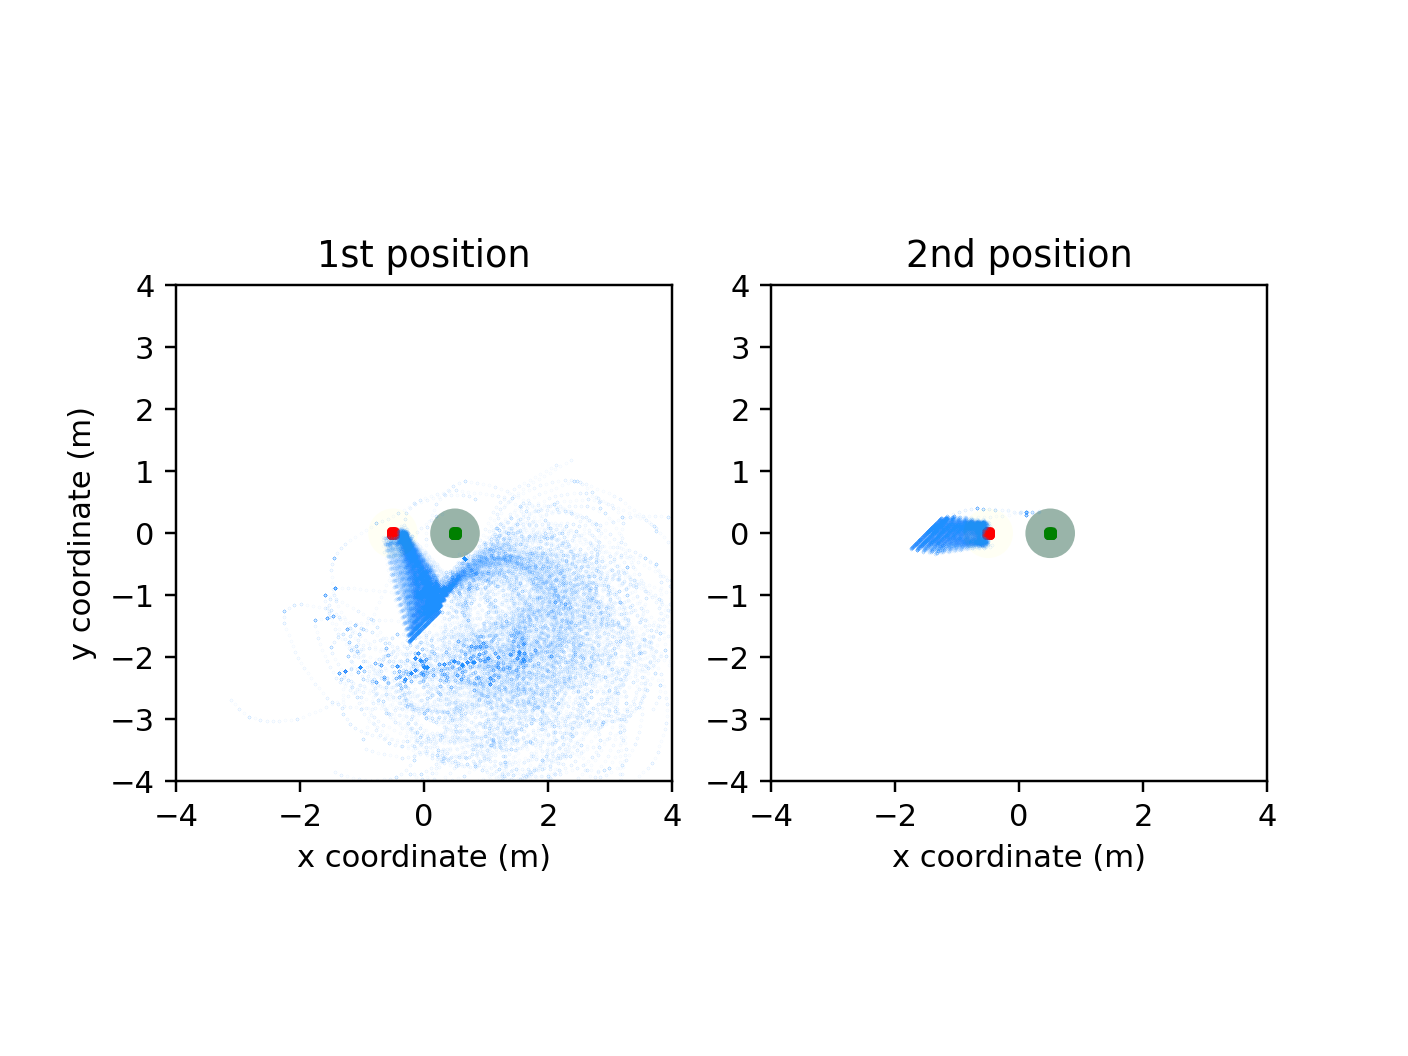

Text(0.5, 0, 'x coordinate (m)')

In [20]:
fig5, ax5 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([0, 1]))
ax5[0].add_collection(p1)

ax5[0].scatter(v1c0_obj[:, 0], v1c0_obj[:, 1],
                 s=1, c='red', alpha=0.2)
ax5[0].scatter(v1c0_obj[:, 2], v1c0_obj[:, 3],
                 s=1, c='green', alpha=0.2)

ax5[0].scatter(v1c0_xya[:, 0], v1c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.1)
ax5[0].set_xlim([-4, 4])
ax5[0].set_ylim([-4, 4])
ax5[0].set_title('1st position')
ax5[0].set_aspect('equal')
ax5[0].set_xlabel('x coordinate (m)')
ax5[0].set_ylabel('y coordinate (m)')

######################
p2 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p2.set_array(np.array([0, 1]))
ax5[1].add_collection(p2)
ax5[1].scatter(v2c0_obj[:, 0], v2c0_obj[:, 1],
                 s=1, c='red', alpha=0.2)
ax5[1].scatter(v2c0_obj[:, 2], v2c0_obj[:, 3],
                 s=1, c='green', alpha=0.2)

ax5[1].scatter(v2c0_xya[:, 0], v2c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.1)
ax5[1].set_xlim([-4, 4])
ax5[1].set_ylim([-4, 4])
ax5[1].set_title('2nd position')
ax5[1].set_aspect('equal')
ax5[1].set_xlabel('x coordinate (m)')

<IPython.core.display.Javascript object>


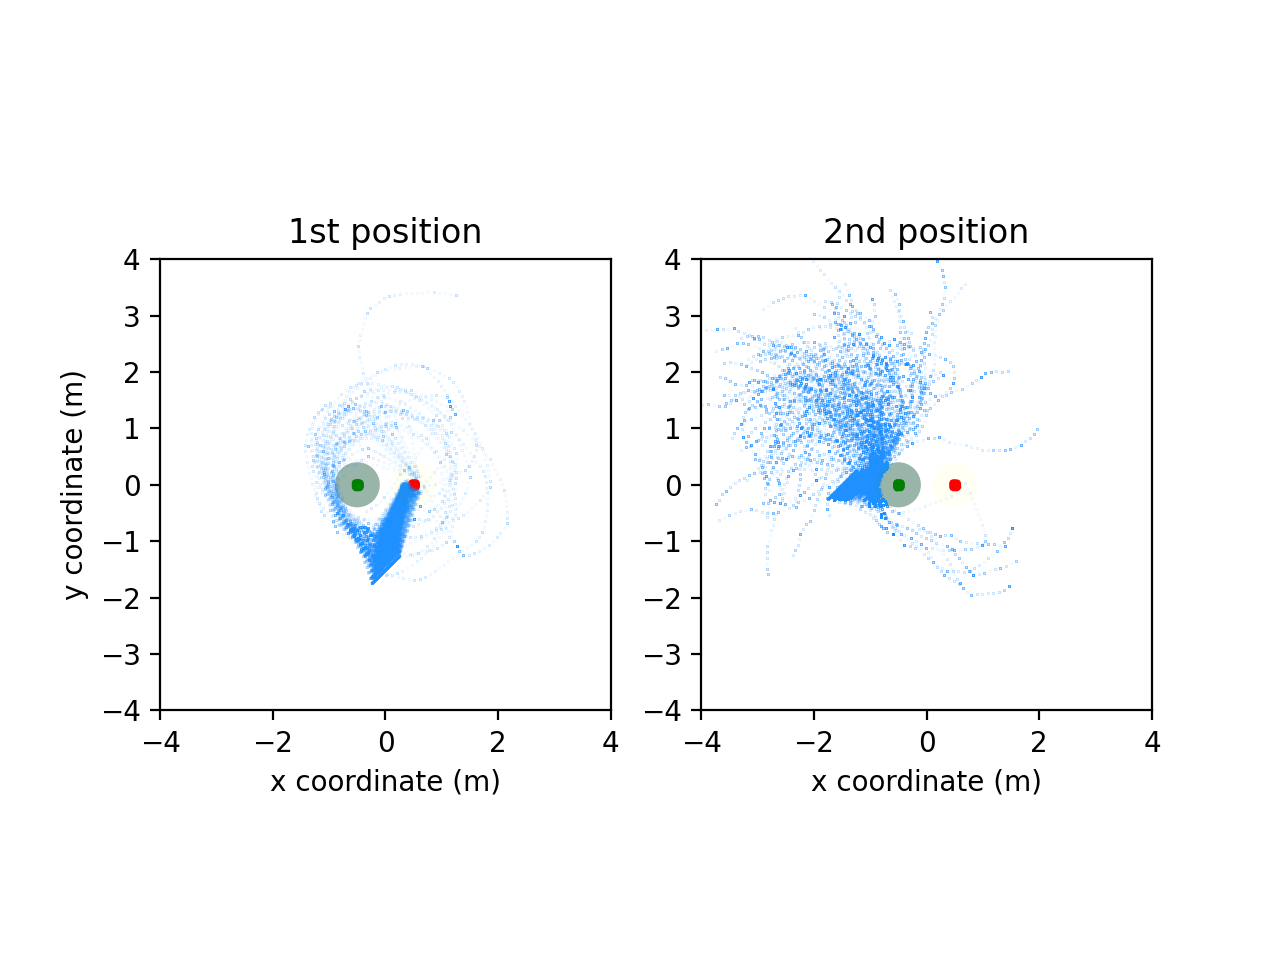

Text(0.5, 0, 'x coordinate (m)')

In [181]:
fig6, ax6 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([1, 0]))
ax6[0].add_collection(p1)

ax6[0].scatter(v1c0_obj[:, 0], v1c0_obj[:, 1],
                 s=1, c='green', alpha=0.2)
ax6[0].scatter(v1c0_obj[:, 2], v1c0_obj[:, 3],
                 s=1, c='red', alpha=0.2)

ax6[0].scatter(v1c1_xya[:, 0], v1c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.2)
ax6[0].set_xlim([-4, 4])
ax6[0].set_ylim([-4, 4])
ax6[0].set_title('1st position')
ax6[0].set_aspect('equal')
ax6[0].set_xlabel('x coordinate (m)')
ax6[0].set_ylabel('y coordinate (m)')
######################
p2 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p2.set_array(np.array([1, 0]))
ax6[1].add_collection(p2)

ax6[1].scatter(v2c0_obj[:, 0], v2c0_obj[:, 1],
                 s=1, c='green', alpha=0.2)
ax6[1].scatter(v2c0_obj[:, 2], v2c0_obj[:, 3],
                 s=1, c='red', alpha=0.2)

ax6[1].scatter(v2c1_xya[:, 0], v2c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.2)
ax6[1].set_xlim([-4, 4])
ax6[1].set_ylim([-4, 4])
ax6[1].set_title('2nd position')
ax6[1].set_aspect('equal')
ax6[1].set_xlabel('x coordinate (m)')

<IPython.core.display.Javascript object>


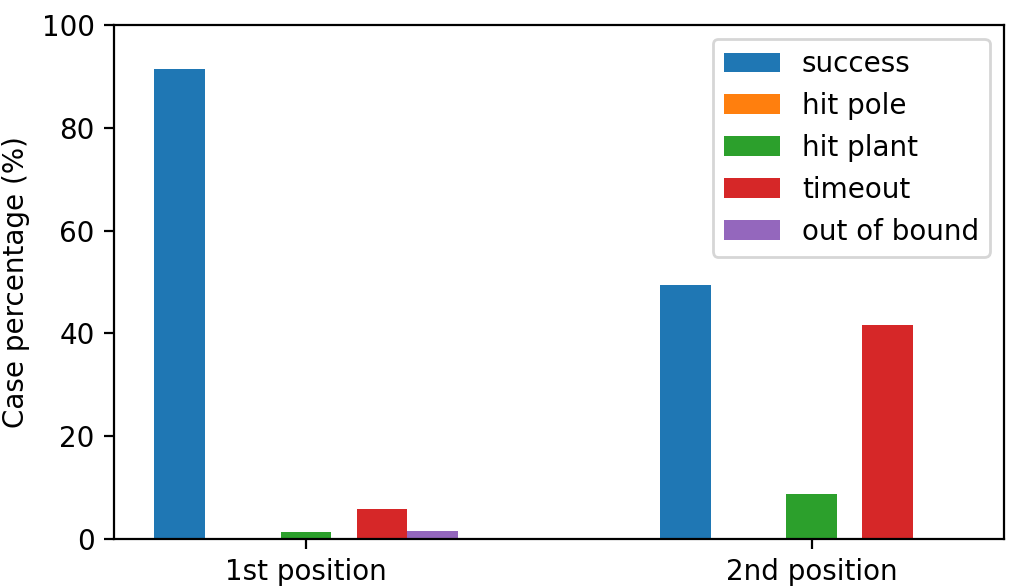

In [158]:
bar_labels = ['1st position', '2nd position']

v1end_cent = [len(i)/20 for i in v1end]
v2end_cent = [len(i)/20 for i in v2end]

e0_cent = [v1end_cent[0], v2end_cent[0]]
e1_cent = [v1end_cent[1], v2end_cent[1]]
e2_cent = [v1end_cent[2], v2end_cent[2]]
e3_cent = [v1end_cent[3], v2end_cent[3]]
e4_cent = [v1end_cent[4], v2end_cent[4]]


with_action_memory_success = [v2_metrics['success_rate'][0]*100]
no_action_memory_success = [v1_metrics['success_rate'][0]*100]
x = np.arange(2*len(bar_labels), step=2)
width = 0.2
fig8, ax8 = plt.subplots()

ax8.bar(x - 2.5*width, e0_cent, width, label='success')
ax8.bar(x - 1.5*width, e1_cent, width, label='hit pole')
ax8.bar(x, e2_cent, width, label='hit plant')
ax8.bar(x + 1.5*width, e3_cent, width, label='timeout')
ax8.bar(x + 2.5*width, e4_cent, width, label='out of bound')

ax8.set_ylabel('Case percentage (%)')
ax8.set_xticks(x)
ax8.set_xticklabels(bar_labels)
ax8.legend()
ax8.set_ylim([0, 100])

fig8.tight_layout()

<IPython.core.display.Javascript object>


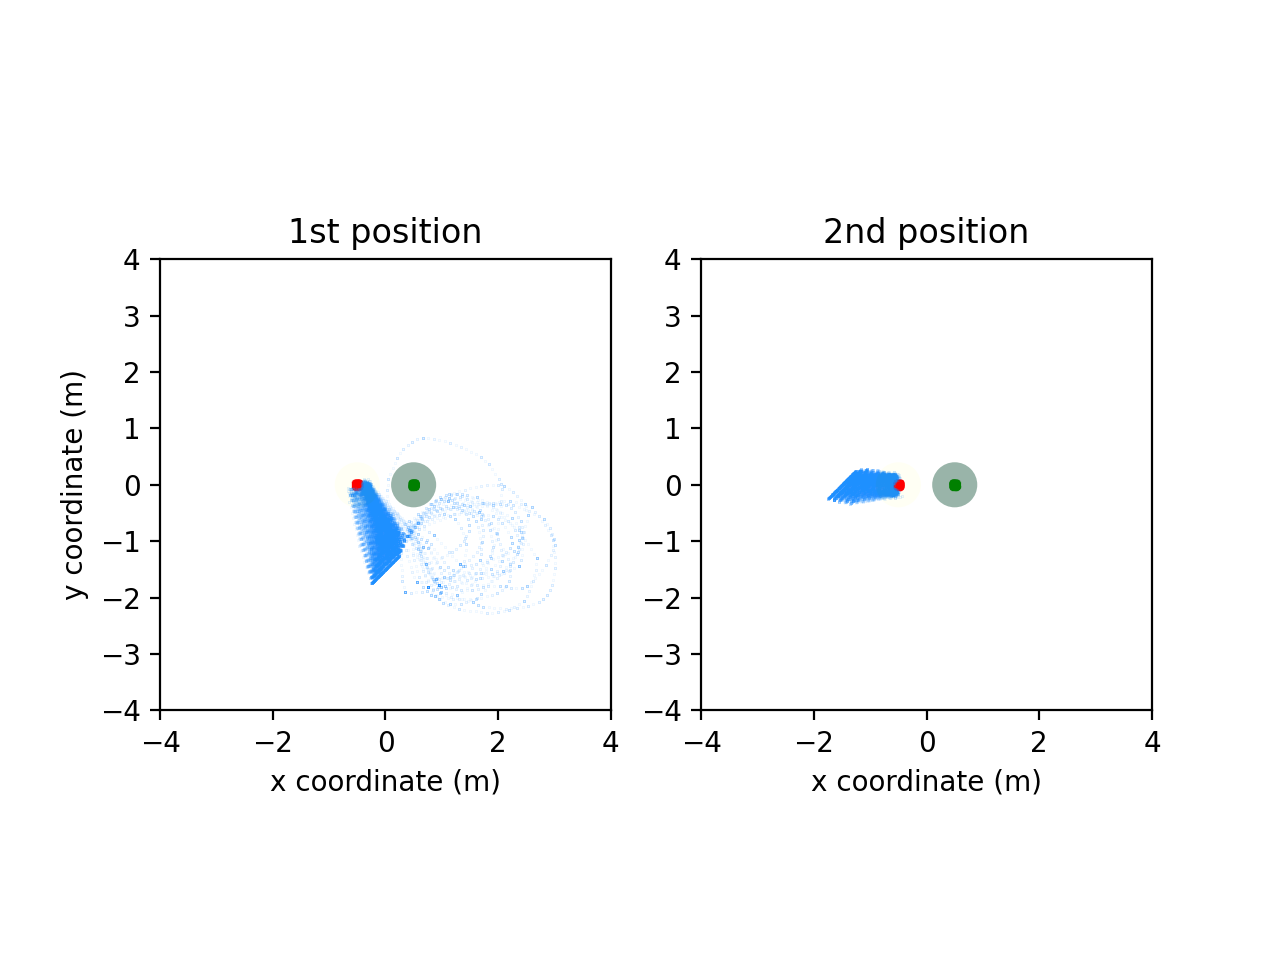

Text(0.5, 0, 'x coordinate (m)')

In [151]:
fig9, ax9 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([0, 1]))
ax9[0].add_collection(p1)

ax9[0].scatter(v1e0c0_obj[:, 0], v1e0c0_obj[:, 1],
                 s=1, c='red', alpha=0.2)
ax9[0].scatter(v1e0c0_obj[:, 2], v1e0c0_obj[:, 3],
                 s=1, c='green', alpha=0.2)

ax9[0].scatter(v1e0c0_xya[:, 0], v1e0c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.2)
ax9[0].set_xlim([-4, 4])
ax9[0].set_ylim([-4, 4])
ax9[0].set_title('1st position')
ax9[0].set_aspect('equal')
ax9[0].set_xlabel('x coordinate (m)')
ax9[0].set_ylabel('y coordinate (m)')

######################
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([0, 1]))
ax9[1].add_collection(p1)


ax9[1].scatter(v2e0c0_obj[:, 0], v2e0c0_obj[:, 1],
                 s=1, c='red', alpha=0.2)
ax9[1].scatter(v2e0c0_obj[:, 2], v2e0c0_obj[:, 3],
                 s=1, c='green', alpha=0.2)

ax9[1].scatter(v2e0c0_xya[:, 0], v2e0c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.2)
ax9[1].set_xlim([-4, 4])
ax9[1].set_ylim([-4, 4])
ax9[1].set_title('2nd position')
ax9[1].set_aspect('equal')
ax9[1].set_xlabel('x coordinate (m)')


<IPython.core.display.Javascript object>


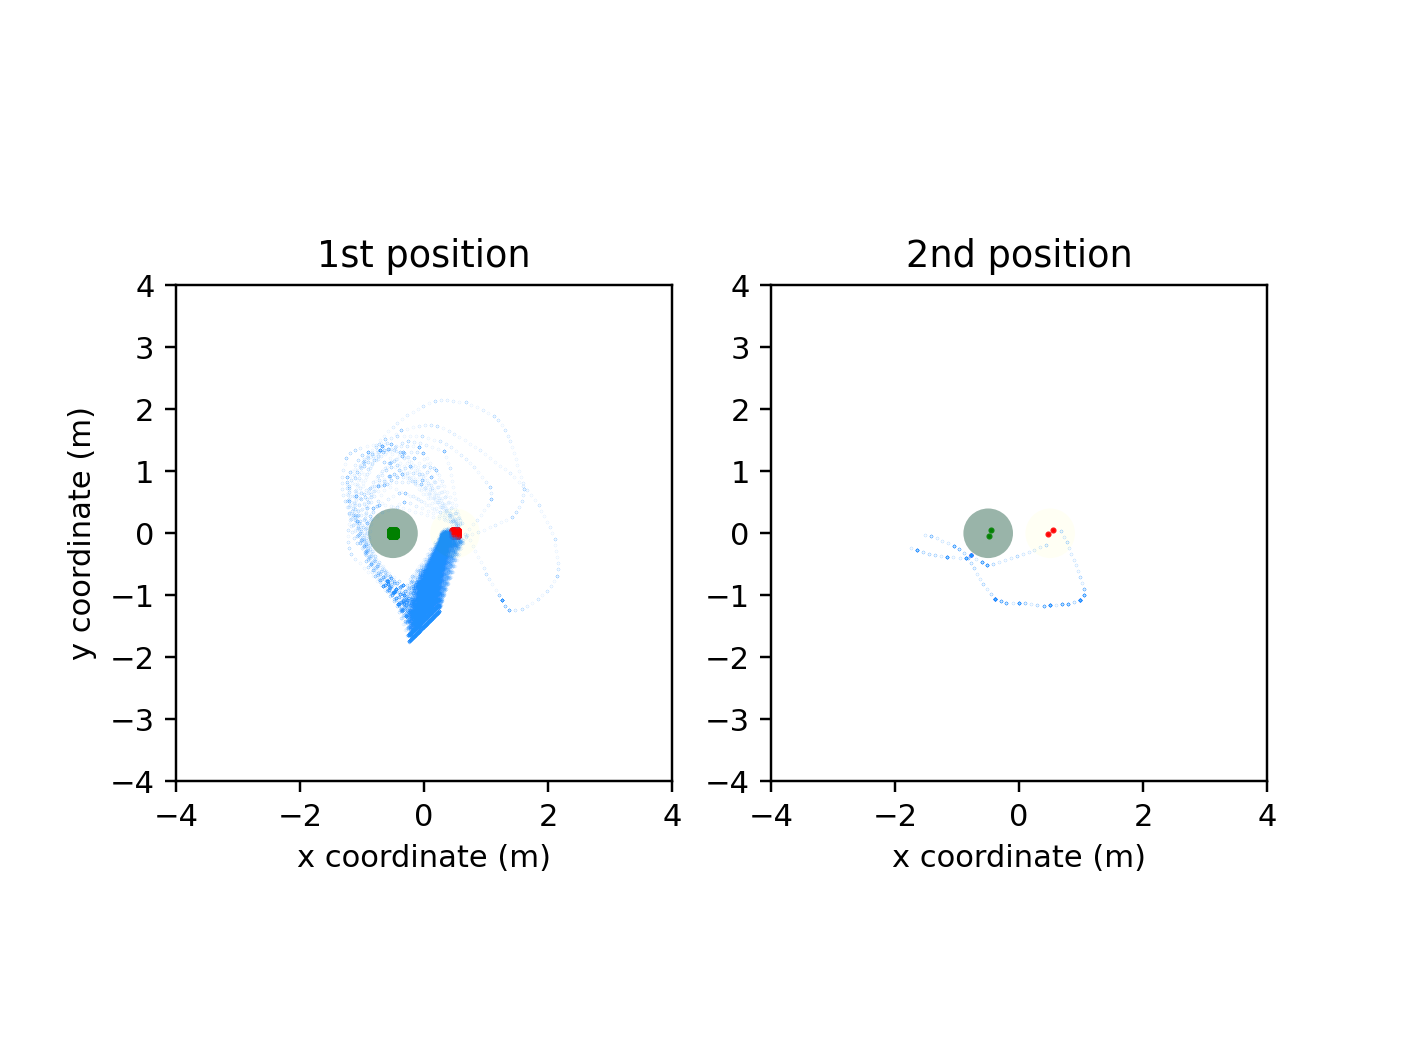

Text(0.5, 0, 'x coordinate (m)')

In [188]:
fig10, ax10 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([1, 0]))
ax10[0].add_collection(p1)

ax10[0].scatter(v1e0c1_obj[:, 0], v1e0c1_obj[:, 1],
                 s=1, c='green', alpha=0.9)
ax10[0].scatter(v1e0c1_obj[:, 2], v1e0c1_obj[:, 3],
                 s=1, c='red', alpha=0.9)

ax10[0].scatter(v1e0c1_xya[:, 0], v1e0c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.2)
ax10[0].set_xlim([-4, 4])
ax10[0].set_ylim([-4, 4])
ax10[0].set_title('1st position')
ax10[0].set_aspect('equal')
ax10[0].set_xlabel('x coordinate (m)')
ax10[0].set_ylabel('y coordinate (m)')
######################

p2 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p2.set_array(np.array([1, 0]))
ax10[1].add_collection(p2)
ax10[1].scatter(v2e0c1_obj[:, 0], v2e0c1_obj[:, 1],
                 s=1, c='green', alpha=0.9)
ax10[1].scatter(v2e0c1_obj[:, 2], v2e0c1_obj[:, 3],
                 s=1, c='red', alpha=0.9)

ax10[1].scatter(v2e0c1_xya[:, 0], v2e0c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.5)
ax10[1].set_xlim([-4, 4])
ax10[1].set_ylim([-4, 4])
ax10[1].set_title('2nd position')
ax10[1].set_aspect('equal')
ax10[1].set_xlabel('x coordinate (m)')


<IPython.core.display.Javascript object>


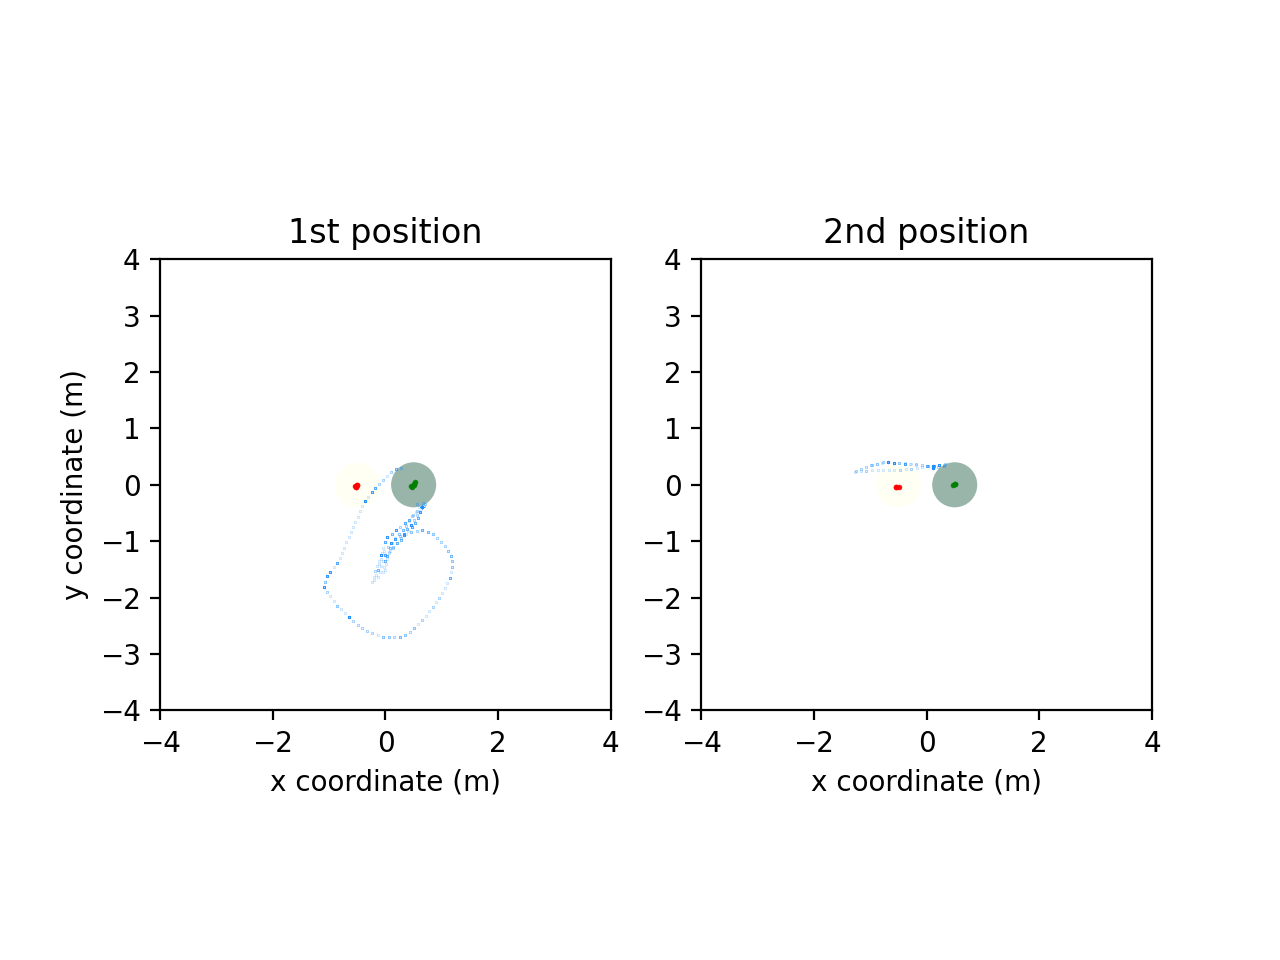

Text(0.5, 0, 'x coordinate (m)')

In [172]:
fig12, ax12 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([0, 1]))
ax12[0].add_collection(p1)

ax12[0].scatter(v1e2c0_obj[:, 0], v1e2c0_obj[:, 1],
                 s=1, c='red', alpha=0.9)
ax12[0].scatter(v1e2c0_obj[:, 2], v1e2c0_obj[:, 3],
                 s=1, c='green', alpha=0.9)

ax12[0].scatter(v1e2c0_xya[:, 0], v1e2c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.7)
ax12[0].set_xlim([-4, 4])
ax12[0].set_ylim([-4, 4])
ax12[0].set_title('1st position')
ax12[0].set_aspect('equal')
ax12[0].set_xlabel('x coordinate (m)')
ax12[0].set_ylabel('y coordinate (m)')

######################
p2 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p2.set_array(np.array([0, 1]))
ax12[1].add_collection(p2)

ax12[1].scatter(v2e2c0_obj[:, 0], v2e2c0_obj[:, 1],
                 s=1, c='red', alpha=0.9)
ax12[1].scatter(v2e2c0_obj[:, 2], v2e2c0_obj[:, 3],
                 s=1, c='green', alpha=0.9)

ax12[1].scatter(v2e2c0_xya[:, 0], v2e2c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.7)
ax12[1].set_xlim([-4, 4])
ax12[1].set_ylim([-4, 4])
ax12[1].set_title('2nd position')
ax12[1].set_aspect('equal')
ax12[1].set_xlabel('x coordinate (m)')

<IPython.core.display.Javascript object>


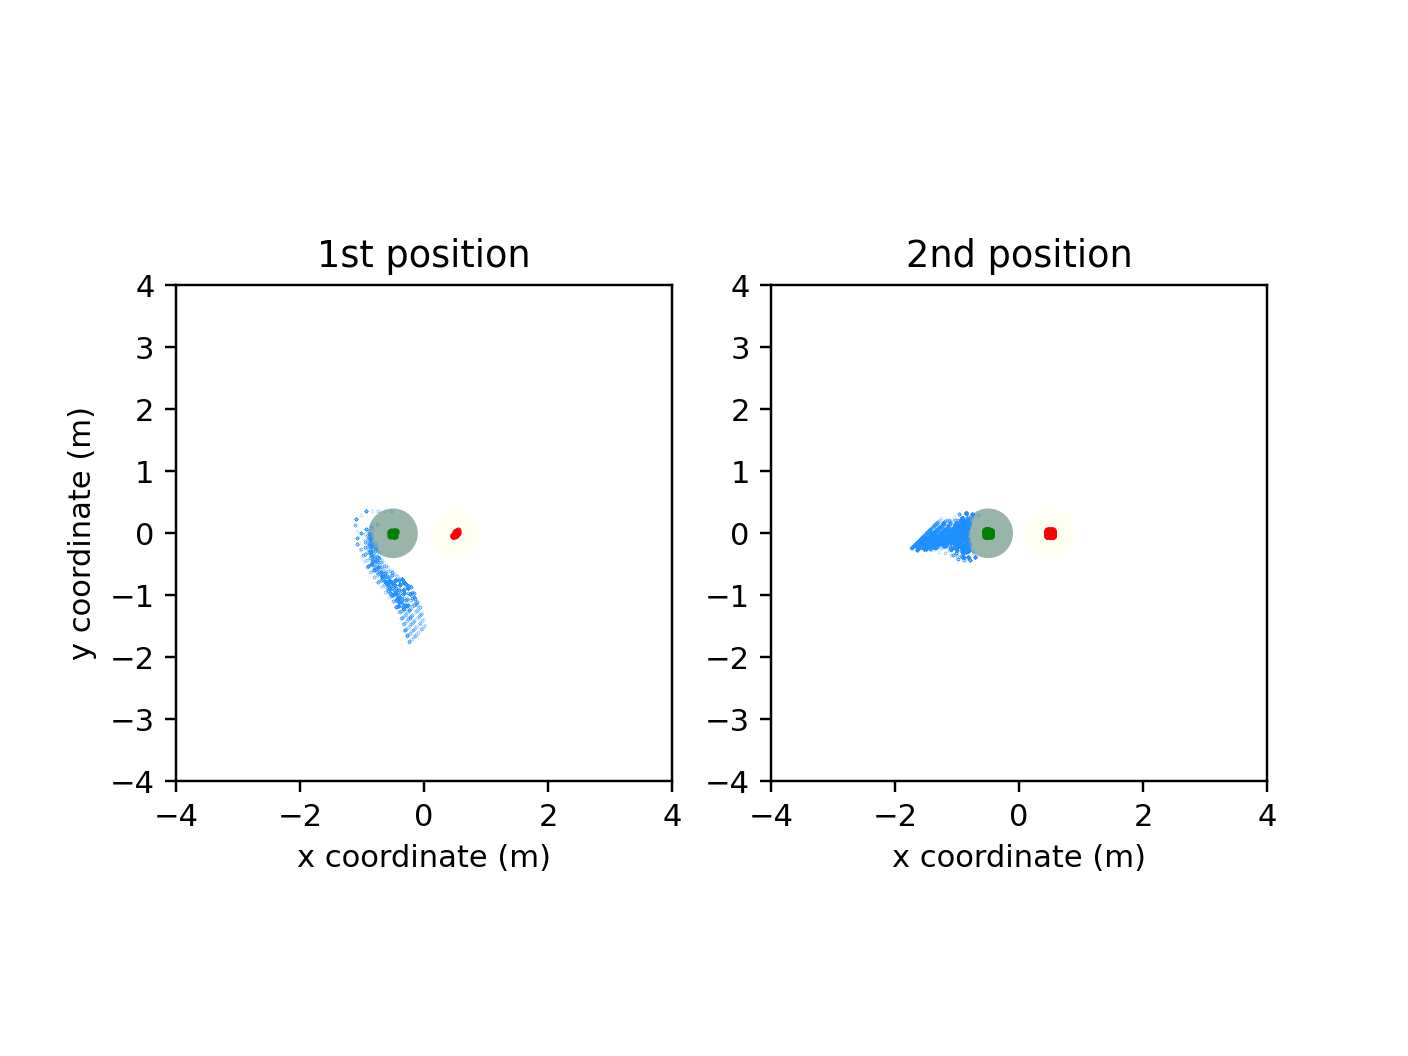

Text(0.5, 0, 'x coordinate (m)')

In [194]:
fig13, ax13 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([1, 0]))
ax13[0].add_collection(p1)

ax13[0].scatter(v1e2c1_obj[:, 0], v1e2c1_obj[:, 1],
                 s=1, c='green', alpha=0.9)
ax13[0].scatter(v1e2c1_obj[:, 2], v1e2c1_obj[:, 3],
                 s=1, c='red', alpha=0.9)

ax13[0].scatter(v1e2c1_xya[:, 0], v1e2c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.7)
ax13[0].set_xlim([-4, 4])
ax13[0].set_ylim([-4, 4])
ax13[0].set_title('1st position')
ax13[0].set_aspect('equal')
ax13[0].set_xlabel('x coordinate (m)')
ax13[0].set_ylabel('y coordinate (m)')
######################
p2 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p2.set_array(np.array([1, 0]))
ax13[1].add_collection(p2)

ax13[1].scatter(v2e2c1_obj[:, 0], v2e2c1_obj[:, 1],
                 s=1, c='green', alpha=0.9)
ax13[1].scatter(v2e2c1_obj[:, 2], v2e2c1_obj[:, 3],
                 s=1, c='red', alpha=0.9)

ax13[1].scatter(v2e2c1_xya[:, 0], v2e2c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.7)
ax13[1].set_xlim([-4, 4])
ax13[1].set_ylim([-4, 4])
ax13[1].set_title('2nd position')
ax13[1].set_aspect('equal')
ax13[1].set_xlabel('x coordinate (m)')

<IPython.core.display.Javascript object>


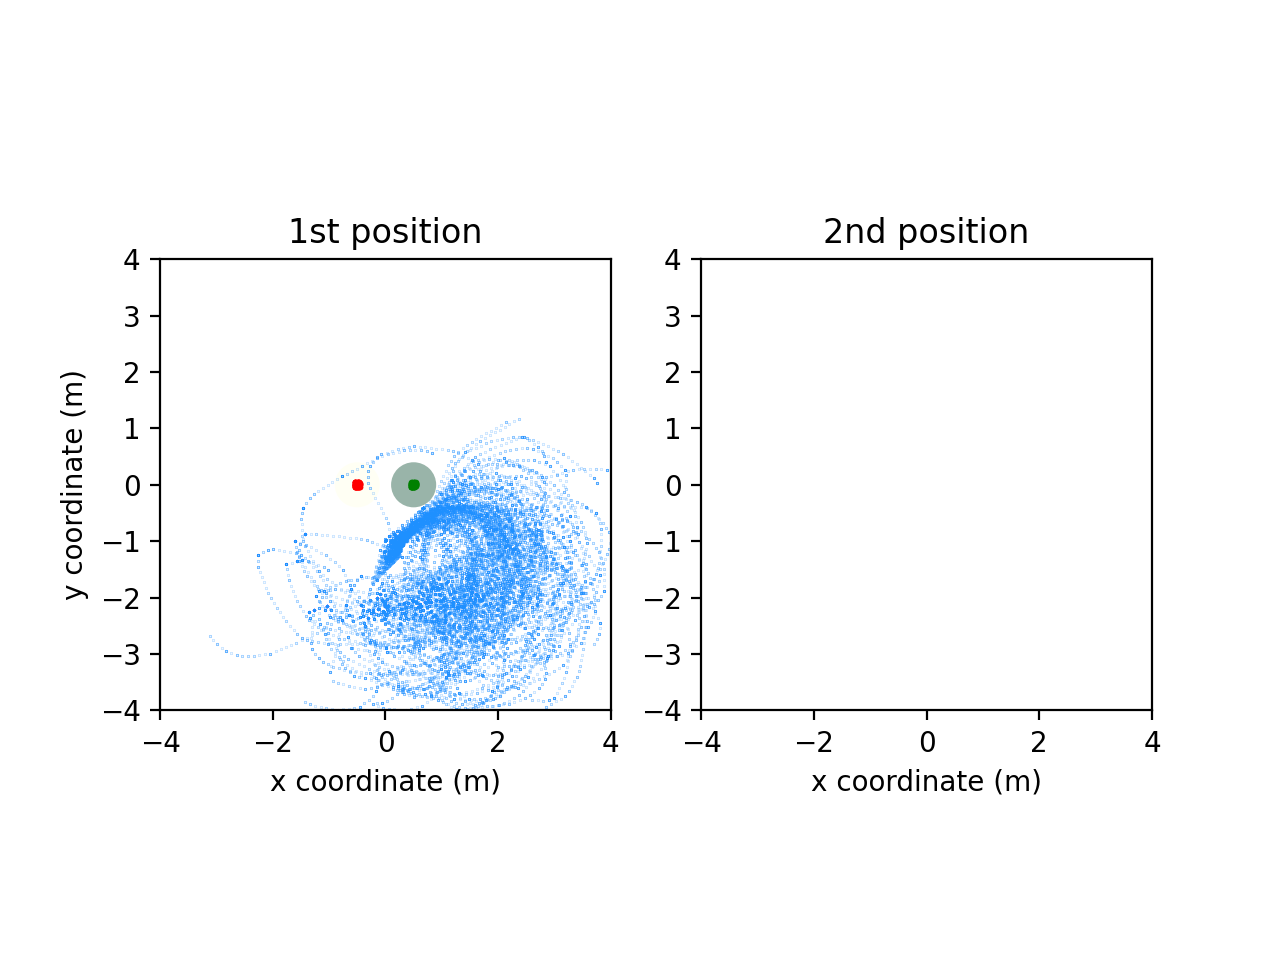

Text(0.5, 0, 'x coordinate (m)')

In [177]:
fig15, ax15 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([0, 1]))
ax15[0].add_collection(p1)

ax15[0].scatter(v1e3c0_obj[:, 0], v1e3c0_obj[:, 1],
                 s=1, c='red', alpha=0.9)
ax15[0].scatter(v1e3c0_obj[:, 2], v1e3c0_obj[:, 3],
                 s=1, c='green', alpha=0.9)

ax15[0].scatter(v1e3c0_xya[:, 0], v1e3c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.7)
ax15[0].set_xlim([-4, 4])
ax15[0].set_ylim([-4, 4])
ax15[0].set_title('1st position')
ax15[0].set_aspect('equal')
ax15[0].set_xlabel('x coordinate (m)')
ax15[0].set_ylabel('y coordinate (m)')

######################
"""
obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p2 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p2.set_array(np.array([0, 1]))
ax15[1].add_collection(p2)
"""

ax15[1].scatter(v2e3c0_obj[:, 0], v2e3c0_obj[:, 1],
                 s=1, c='red', alpha=0.9)
ax15[1].scatter(v2e3c0_obj[:, 2], v2e3c0_obj[:, 3],
                 s=1, c='green', alpha=0.9)

ax15[1].scatter(v2e3c0_xya[:, 0], v2e3c0_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.7)
ax15[1].set_xlim([-4, 4])
ax15[1].set_ylim([-4, 4])
ax15[1].set_title('2nd position')
ax15[1].set_aspect('equal')
ax15[1].set_xlabel('x coordinate (m)')


<IPython.core.display.Javascript object>


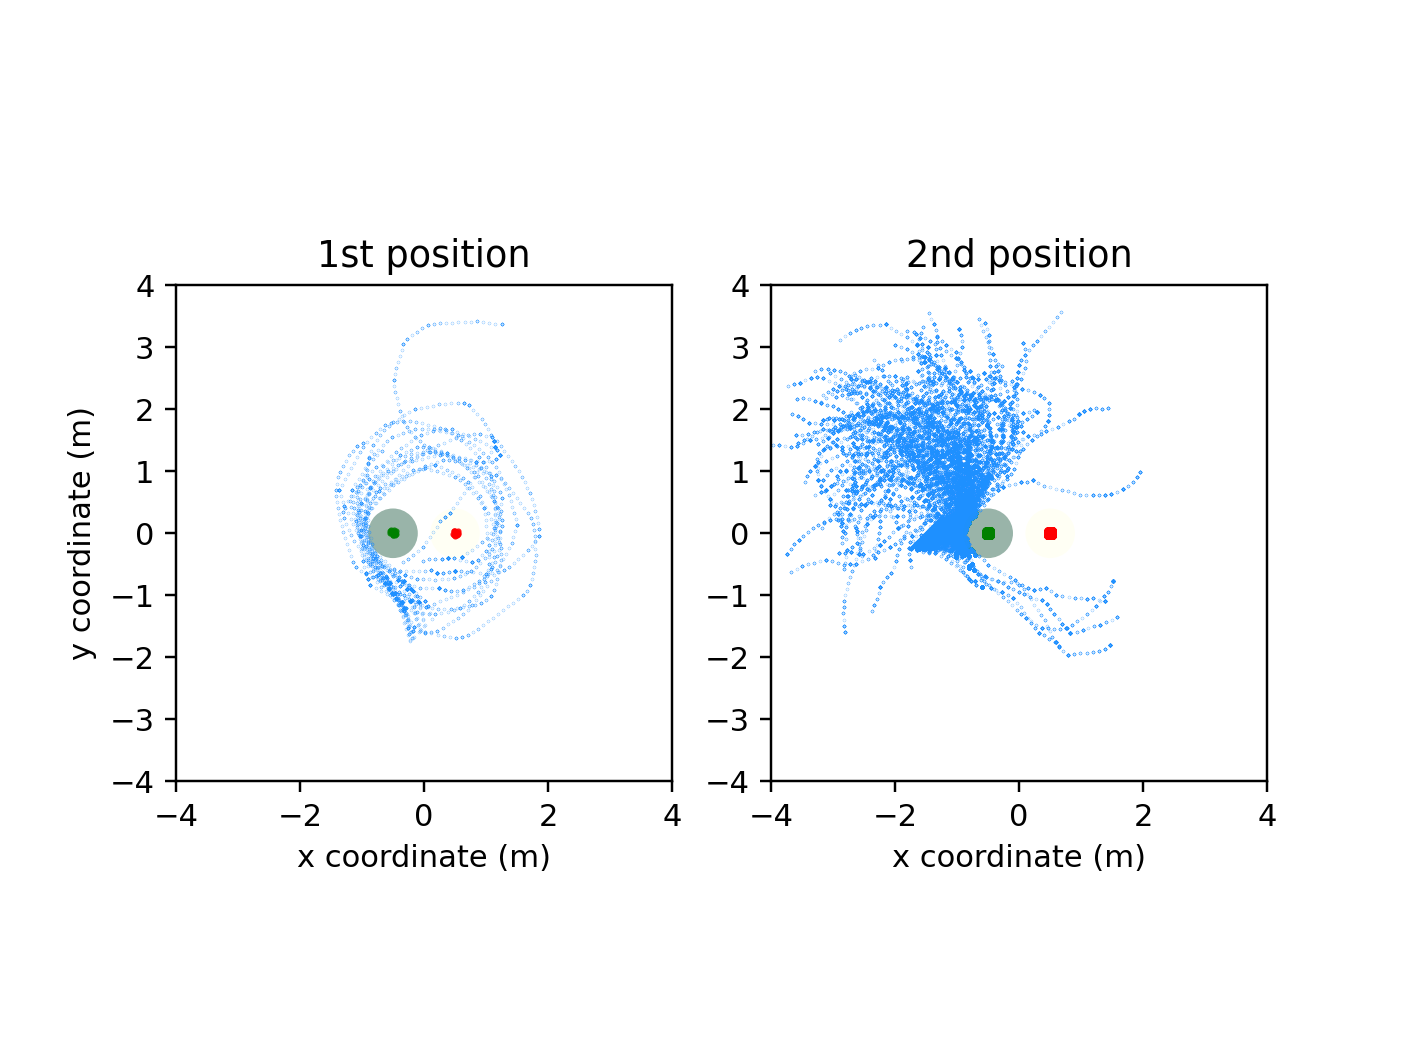

Text(0.5, 0, 'x coordinate (m)')

In [202]:
fig16, ax16 = plt.subplots(1,2)

obj0_circle = Circle((-0.5, 0), 0.4, ec='none')
obj1_circle = Circle((0.5, 0), 0.4, ec='none')
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([1, 0]))
ax16[0].add_collection(p1)

ax16[0].scatter(v1e3c1_obj[:, 0], v1e3c1_obj[:, 1],
                 s=1, c='green', alpha=0.9)
ax16[0].scatter(v1e3c1_obj[:, 2], v1e3c1_obj[:, 3],
                 s=1, c='red', alpha=0.9)

ax16[0].scatter(v1e3c1_xya[:, 0], v1e3c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.8)
ax16[0].set_xlim([-4, 4])
ax16[0].set_ylim([-4, 4])
ax16[0].set_title('1st position')
ax16[0].set_aspect('equal')
ax16[0].set_xlabel('x coordinate (m)')
ax16[0].set_ylabel('y coordinate (m)')
######################
p1 = PatchCollection([obj0_circle, obj1_circle], cmap='YlGn', alpha=0.4)
p1.set_array(np.array([1, 0]))
ax16[1].add_collection(p1)

ax16[1].scatter(v2e3c1_obj[:, 0], v2e3c1_obj[:, 1],
                 s=1, c='green', alpha=0.9)
ax16[1].scatter(v2e3c1_obj[:, 2], v2e3c1_obj[:, 3],
                 s=1, c='red', alpha=0.9)

ax16[1].scatter(v2e3c1_xya[:, 0], v2e3c1_xya[:, 1],
                 s=0.01, c='dodgerblue', alpha=0.8)
ax16[1].set_xlim([-4, 4])
ax16[1].set_ylim([-4, 4])
ax16[1].set_title('2nd position')
ax16[1].set_aspect('equal')
ax16[1].set_xlabel('x coordinate (m)')
